In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def generate(seq_length, num_samples):
    X = []
    Y = []
    for i in range(num_samples):
        # print("i: ", i)
        # print("start, stop:", i*2*np.pi, (i+1)*2*np.pi)
        # print("num_samples:", seq_length+1)
        x = np.linspace(i*2*np.pi, (i+1)*2*np.pi, seq_length+1)
        sin_wave = np.sin(x)
        # print("sin wave: ", sin_wave)
        X.append(sin_wave[:-1])
        Y.append(sin_wave[1:])
        # print("X:", X)
        # print("Y: ", Y)
    return np.array(X), np.array(Y)

In [28]:
seq_length = 50
num_samples = 1000
X, Y = generate(seq_length, num_samples)

X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32)

print(X.shape, Y.shape)

torch.Size([1000, 50]) torch.Size([1000, 50])


In [29]:
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out)
        return out

input_size = 1
hidden_size = 20
output_size = 1

model = SimpleRNN(input_size, hidden_size, output_size)


In [30]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100

for epoch in range(num_epochs):
    model.train()
    outputs = model(X.unsqueeze(2))
    loss = criterion(outputs, Y.unsqueeze(2))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch%10 == 0:
        print(f' Epoch: {epoch+1}/{num_epochs} , Loss: {loss.item():.4f}')

 Epoch: 1/100 , Loss: 0.4771
 Epoch: 11/100 , Loss: 0.3659
 Epoch: 21/100 , Loss: 0.2519
 Epoch: 31/100 , Loss: 0.1351
 Epoch: 41/100 , Loss: 0.0671
 Epoch: 51/100 , Loss: 0.0520
 Epoch: 61/100 , Loss: 0.0341
 Epoch: 71/100 , Loss: 0.0242
 Epoch: 81/100 , Loss: 0.0149
 Epoch: 91/100 , Loss: 0.0087


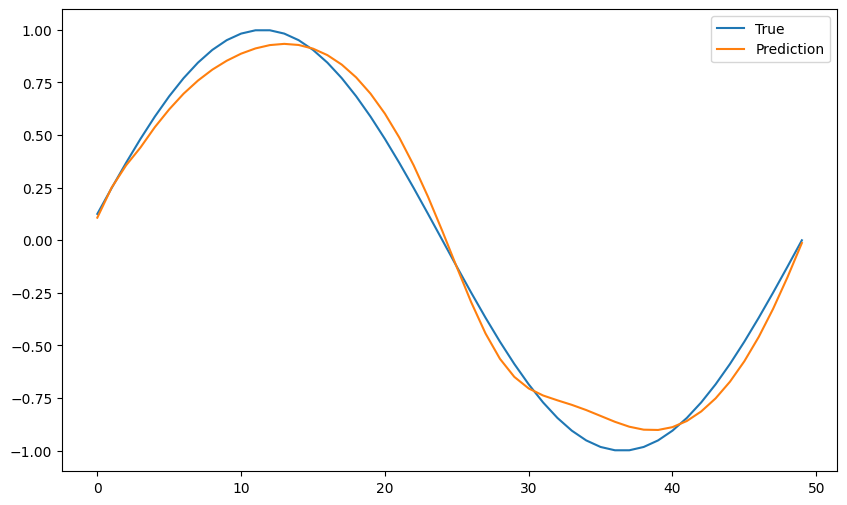

In [31]:
model.eval()

with torch.no_grad():
    predictions = model(X.unsqueeze(2)).squeeze(2).numpy()

plt.figure(figsize=(10, 6))
plt.plot(Y[0].numpy(), label="True")
plt.plot(predictions[0], label="Prediction")
plt.legend()
plt.show()